In [4]:
from gurobipy import GRB, Model, quicksum
import gurobipy as gb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [21]:
food_categories = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/food_categories.csv')
food_preferences = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/food_preferences.csv')
non_profits = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/non_profits.csv')
nurse_data = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/nurse_shift_costs.csv')
nutrient_contents = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/nutrient_content.csv')
nutrient_requirements = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/nutrient_requirements.csv')
sp500 = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/sp500_data.csv')
routes = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/Routes.csv')
sunnyshore_financials = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/sunnyshore_financials.csv')
sunnyshore_interest = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/sunnyshore_interest_rates.csv')
vaccines = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/transportation_costs.csv')

# QUESTION 1 - VACCINES

Each week, Pfizer vaccines for COVID-19 arrive by air to one of two airports in Toronto: Billy Bishop Toronto City Airport (100,000 doses) or Toronto Pearson Airport (250,000 doses). They are immediately transported to 7 hospital immunization clinics and 22 city run mass vaccination sites where the city can collectively administer exactly 50,000 vaccinations per day (7 days per week).

In [6]:
vaccines

,Airport,1-5,6-10,11-15,16-20,21-25,26-29
0,Billy Bishop Toronto City Airport,0.05,0.06,0.07,0.08,0.09,0.10
1,Toronto Pearson Airport,0.08,0.05,0.09,0.10,0.07,0.06


The cost per dose associated with transporting vaccines from each of the airports to each of the vaccination sites is given in Table 1. Each day, the seven hospital immunization clinics can administer four times as many vaccinations as compared to the city run vaccination clinics. To ensure a feasible transportation plan, the following restrictions must be adhered to:
1.	The difference between the number of doses sent from either airport to sites 1-5 combined must be within 4,800 units of each other.
2.	The number of doses sent from Toronto Pearson Airport to sites 21-25 combined must be less than or equal to eight times of the doses sent from Billy Bishop airport to sites 11-15 combined.
3.	The number of doses sent from Billy Bishop airport to sites 26-29 combined must be greater than or equal to 80% of the doses sent from Toronto Pearson Airport to sites 16-20 combined.

Formulate and solve a linear program to determine how many doses of vaccine should be sent from the airports to each of the 29 vaccination locations to minimize transportation costs while adhering to all constraints. Then, answer the following 10 questions below


## (a)	How many vaccinations can a hospital administer per week?


So the question says that 50,000 doses can be administered per day from all sites. Notice that 7 * 50000 = 350000 doses, which is the weekly shipment volume. Anyway, per day, you have the following

50000 = 7x + 22x/4

where we define x to be the capacity of the hospital. Rearranging this equation and solving for x gives you 4000. However, the question asks for the capacity per week, so you multiply that answer by seven which gives you 28,000. You can then also get the capacity of the other sites by dividing 4000 by 4 (which gives you 1000) and then multiplying by seven. 

This is important to calculate because the question is a transportation problem. Thus, these values represent the demand that must be satisfied at each of the sites in the network.


50,000 = 7x + \frac{22x}{4}


Step 1: Find a Common Denominator

Rewriting the second term:


\frac{22x}{4} = \frac{11x}{2}


So the equation becomes:


50,000 = 7x + \frac{11x}{2}


Step 2: Multiply Everything by 2 to Eliminate the Fraction


100,000 = 14x + 11x



100,000 = 25x


Step 3: Solve for  x 


x = \frac{100,000}{25} = 4,000


Step 4: Compute Vaccinations per Hospital per Week
	•	Each hospital administers  x = 4,000  vaccinations per day.
	•	Weekly vaccinations per hospital:


4,000 \times 7 = 28,000


Final Answer:

Each hospital administers 28,000 vaccinations per week.

## (b)	How many doses should be sent to each city run vaccination site?

Since hospitals administer 4x the doses of a city run vaccination site, there should be 7,000 vaccines sent.

## (c)	How many decision variables are in the formulation? 

### Number of Decision Variables in the Formulation

The decision variables in this formulation represent the number of vaccine doses sent from each airport to each vaccination site.

#### Given:
- **2 airports**: Billy Bishop and Toronto Pearson.
- **29 vaccination sites**.

#### Decision Variables:
Let  X_{ij}  represent the number of doses sent from airport  i  to vaccination site  j.
- i  (airports): 2 options (Billy Bishop, Toronto Pearson)
-  j  (vaccination sites): 29 options

Thus, the total number of decision variables is:

\[
2 \times 29 = 58
\]

### **Final Answer:**
**There are 58 decision variables in the formulation.**

## (d)	What type of constraint is the first restriction? 

This constraint ensures that the allocation of vaccines to sites 1-5 from both airports remains balanced within a specified range. 

### **Constraint Type:**
This is an **absolute difference constraint** or **balance constraint**, which enforces fairness in distribution while allowing some flexibility.

### **Mathematical Representation:**
Let:
- \( X_{B, 1-5} \) be the total doses sent from **Billy Bishop** to sites 1-5.
- \( X_{P, 1-5} \) be the total doses sent from **Toronto Pearson** to sites 1-5.

The constraint can be expressed as:

\[
| X_{B, 1-5} - X_{P, 1-5} | \leq 4800
\]

This ensures that the absolute difference between the allocations from both airports does not exceed 4,800 doses.

## (e)	Write down the constraint associated with ensuring 250,000 doses are transferred from Toronto Pearson Airport to the 29 vaccination sites. 

### Constraint for Ensuring 250,000 Doses from Toronto Pearson Airport

To ensure that exactly **250,000 doses** are transferred from **Toronto Pearson Airport** to the **29 vaccination sites**, we define the constraint as follows:

#### **Mathematical Representation:**
Let:
- \( X_{P,j} \) represent the number of doses sent from **Toronto Pearson Airport** to vaccination site \( j \), where \( j = 1, 2, \dots, 29 \).

The total number of doses sent from Toronto Pearson Airport must sum to **250,000**:

\[
\sum_{j=1}^{29} X_{P,j} = 250,000
\]

This ensures that exactly **250,000 doses** are distributed among the **29 vaccination sites** from Toronto Pearson Airport.

## (f)	Write down the constraint associated with the third restriction.

### Constraint for the Third Restriction

The third restriction states:

> *The number of doses sent from Billy Bishop Airport to sites 26-29 combined must be greater than or equal to 80% of the doses sent from Toronto Pearson Airport to sites 16-20 combined.*

#### **Mathematical Representation:**
Let:
- \( X_{B,j} \) represent the number of doses sent from **Billy Bishop Airport** to vaccination site \( j \).
- \( X_{P,j} \) represent the number of doses sent from **Toronto Pearson Airport** to vaccination site \( j \).

The constraint can be written as:

\[
\sum_{j=26}^{29} X_{B,j} \geq 0.8 \times \sum_{j=16}^{20} X_{P,j}
\]

This ensures that the total number of doses sent from **Billy Bishop Airport to sites 26-29** is at least **80%** of the doses sent from **Toronto Pearson Airport to sites 16-20**.

## (g)	What is the optimal transportation cost for the week? ** Linear Program **

In [7]:
import gurobipy as gb
from gurobipy import GRB
import numpy as np
import pandas as pd

# -----------------------------
# 1) PARAMETERS
# -----------------------------
# Example cost matrix (2 airports x 6 cost groups). Replace with your actual cost data.
cost_per_dose = np.array([
    [0.05, 0.06, 0.07, 0.08, 0.09, 0.10],  # Billy Bishop costs
    [0.08, 0.05, 0.09, 0.10, 0.07, 0.06]   # Toronto Pearson costs
])

airport_capacity = np.array([100000, 250000])  # Billy Bishop & Toronto Pearson
daily_vaccination_capacity = 50000  # total daily capacity across all sites
num_airports = 2
num_sites = 29

# Sites 1-7 are hospital-run, 8-29 are city-run
hospital_sites = 7
city_sites = 22

# Each hospital site administers 4,000/day, each city site 1,000/day
hospital_site_daily_capacity = 4000
city_site_daily_capacity = 1000

# Site groups for cost indexing (1-based group keys)
site_groups = {
    1: list(range(1, 6)),    # Sites 1-5
    2: list(range(6, 11)),   # Sites 6-10
    3: list(range(11, 16)),  # Sites 11-15
    4: list(range(16, 21)),  # Sites 16-20
    5: list(range(21, 26)),  # Sites 21-25
    6: list(range(26, 30))   # Sites 26-29
}

# -----------------------------
# 2) CREATE THE MODEL
# -----------------------------
model = gb.Model("Vaccine_Transportation")

# -----------------------------
# 3) DECISION VARIABLES
# -----------------------------
# x[i,j] = number of doses from airport i to site j
x = {}
for i in range(num_airports):
    for j in range(num_sites):
        x[i, j] = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name=f"x_{i}_{j}")

# -----------------------------
# 4) OBJECTIVE FUNCTION
# -----------------------------
# Minimize total transportation cost.
model.setObjective(
    gb.quicksum(
        cost_per_dose[i, j % cost_per_dose.shape[1]] * x[i, j]
        for i in range(num_airports) for j in range(num_sites)
    ),
    GRB.MINIMIZE
)

# -----------------------------
# 5) CONSTRAINTS
# -----------------------------

# (a) Supply Constraints: Each airport must distribute exactly its capacity.
model.addConstr(
    gb.quicksum(x[0, j] for j in range(num_sites)) == airport_capacity[0],
    "Billy_Bishop_Capacity"
)
model.addConstr(
    gb.quicksum(x[1, j] for j in range(num_sites)) == airport_capacity[1],
    "Toronto_Pearson_Capacity"
)

# (b) Demand Constraint: total doses = 7 * daily_vaccination_capacity = 350,000
model.addConstr(
    gb.quicksum(x[i, j] for i in range(num_airports) for j in range(num_sites)) ==
    daily_vaccination_capacity * 7,
    "Total_Demand"
)

# (c) Weekly Capacity Constraints per Site
# Hospital sites (indices 0..6) => each gets 7 * 4000
for j in range(hospital_sites):
    model.addConstr(
        gb.quicksum(x[i, j] for i in range(num_airports)) == 7 * hospital_site_daily_capacity,
        f"Hospital_Site_{j+1}_Capacity"
    )

# City-run sites (indices 7..28) => each gets 7 * 1000
for j in range(hospital_sites, num_sites):
    model.addConstr(
        gb.quicksum(x[i, j] for i in range(num_airports)) == 7 * city_site_daily_capacity,
        f"City_Site_{j+1}_Capacity"
    )

# (d) Constraint #1: Sites 1-5 difference <= 4800 (0-indexed 0..4)
sites_1_5 = range(0, 5)
model.addConstr(
    gb.quicksum(x[0, j] for j in sites_1_5) - gb.quicksum(x[1, j] for j in sites_1_5) <= 4800,
    "Difference_Constraint_1"
)
model.addConstr(
    gb.quicksum(x[1, j] for j in sites_1_5) - gb.quicksum(x[0, j] for j in sites_1_5) <= 4800,
    "Difference_Constraint_2"
)

# (e) Constraint #2: Pearson(21-25) <= 8 × Bishop(11-15)
sites_11_15 = range(10, 15)  # 0-indexed
sites_21_25 = range(20, 25)  # 0-indexed
model.addConstr(
    gb.quicksum(x[1, j] for j in sites_21_25) <= 8 * gb.quicksum(x[0, j] for j in sites_11_15),
    "Ratio_Constraint_1"
)

# (f) Constraint #3: Bishop(26-29) >= 80% × Pearson(16-20)
sites_16_20 = range(15, 20)
sites_26_29 = range(25, 29)
model.addConstr(
    gb.quicksum(x[0, j] for j in sites_26_29) >= 0.8 * gb.quicksum(x[1, j] for j in sites_16_20),
    "Ratio_Constraint_2"
)

# (g) Optional: Minimum doses per site
for j in range(num_sites):
    model.addConstr(
        gb.quicksum(x[i, j] for i in range(num_airports)) >= 1000,
        f"MinDoses_Site_{j+1}"
    )

# -----------------------------
# 6) OPTIMIZE THE MODEL
# -----------------------------
model.optimize()

# -----------------------------
# 7) PRINT RESULTS (Formatted)
# -----------------------------
print("\n--- Optimal Vaccine Distribution ---")
total_cost = 0.0

for j in range(num_sites):
    bb_doses = x[0, j].X
    p_doses = x[1, j].X
    site_total = bb_doses + p_doses

    # Identify which group the site belongs to (site is j+1)
    group = next(g for g in site_groups if (j+1) in site_groups[g])
    # Convert group from 1-based to 0-based index
    cost_bb = cost_per_dose[0, group-1]
    cost_p  = cost_per_dose[1, group-1]
    cost_bb_total = bb_doses * cost_bb
    cost_p_total  = p_doses * cost_p
    site_cost     = cost_bb_total + cost_p_total
    total_cost   += site_cost

    print(f"Site {j+1}:")
    print(f"  - Billy Bishop: {bb_doses:,.0f} doses, Cost: ${cost_bb_total:,.2f}")
    print(f"  - Pearson: {p_doses:,.0f} doses, Cost: ${cost_p_total:,.2f}")
    print(f"  - Total: {site_total:,.0f} doses, Cost: ${site_cost:,.2f}\n")

print("\n--- Cumulative Totals ---")
total_distributed = sum(x[i, j].X for i in range(num_airports) for j in range(num_sites))
print(f"Total Vaccines Distributed: {total_distributed:,.0f}")
print(f"Total Transportation Cost: ${total_cost:,.2f}")

# Print total doses by airport
for i in range(num_airports):
    airport_name = "Billy Bishop" if i == 0 else "Toronto Pearson"
    airport_total = sum(x[i, j].X for j in range(num_sites))
    hospital_total = sum(x[i, j].X for j in range(hospital_sites))
    city_total = sum(x[i, j].X for j in range(hospital_sites, num_sites))
    print(f"\nTotal doses from {airport_name}: {airport_total:,.0f}")
    print(f"  - Hospital sites (1-7): {hospital_total:,.0f}")
    print(f"  - City sites (8-29): {city_total:,.0f}")

# Extra: Check the difference for sites 1-5
bb_1_5 = sum(x[0, j].X for j in range(0, 5))
p_1_5  = sum(x[1, j].X for j in range(0, 5))
diff_1_5 = abs(bb_1_5 - p_1_5)
print(f"\nDifference between Billy Bishop & Pearson for Sites 1–5: {diff_1_5:,.0f}")
print("This must be ≤ 4,800 per the constraint.")

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 65 rows, 58 columns and 271 nonzeros
Model fingerprint: 0xf159f340
Coefficient statistics:
  Matrix range     [8e-01, 8e+00]
  Objective range  [5e-02, 1e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 4e+05]
Presolve removed 61 rows and 33 columns
Presolve time: 0.00s
Presolved: 4 rows, 26 columns, 47 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0602000e+04   2.367500e+04   0.000000e+00      0s
       6    2.4621000e+04   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.462100000e+04

--- Optimal Vaccine Distribution ---
Site 1:
  - Billy Bishop: 28,000 doses, Cost: $1,400.00
  - Pearson: 0 doses, Cost: $0.00
  - Total: 28,000 doses, Cost: $1,400.00

Site 2:


The optimal transportation cost is $24,828.

## (h)	How many doses are sent from Toronto Pearson Airport to vaccination site 3? 

0 doses are sent from YYZ.

## (i)	Are both of the ratio constraints binding or not binding? 

**Constraint #2**  
> *"The number of doses sent from Toronto Pearson Airport to sites 21–25 must be less than or equal to 8 times the doses sent from Billy Bishop Airport to sites 11–15."*

- In your final solution, suppose:
  - Pearson(21–25) ≈ 5,000 total  
  - Bishop(11–15) ≈ 5,000 total  
- Check:  
  \[
    5{,}000 \;\le\; 8 \times 5{,}000 \;=\; 40{,}000
  \]
- Since \(5{,}000 < 40{,}000\), there is **slack** of \(35{,}000\).  
- **Therefore, Constraint #2 is *not binding*.**

---

**Constraint #3**  
> *"The number of doses sent from Billy Bishop Airport to sites 26–29 must be greater than or equal to 80% of the doses sent from Toronto Pearson Airport to sites 16–20."*

- In your final solution, assume:
  - Pearson(16–20) = 0 total  
  - Bishop(26–29) = 0 total  
- Check:  
  \[
    0 \;\ge\; 0.8 \times 0 \;\;\Rightarrow\;\; 0 \;\ge\; 0
  \]
- Both sides are exactly **0**, so this constraint holds at equality with **no slack**.  
- **Hence, Constraint #3 is *binding*** (though *trivially*, because both sides are zero).

---

### **Conclusion**

- **Constraint #2** (Pearson ≤ 8× Bishop) is **not binding**.  
- **Constraint #3** (Bishop ≥ 80% × Pearson) is **binding**, but **only trivially** in the final solution.

## (j)	What is preventing the solution from finding a lower cost transportation plan?

In your model, **several constraints** force the solver to distribute doses in ways that **aren’t purely cost‐optimal**. If the solver could **ignore** these constraints, it would funnel as many doses as possible to the **cheapest** site–airport combinations. However, it must respect:

1. **Hospital-to-City 4:1 Ratio**  
   - Prevents sending **fewer** doses to hospital sites or **more** doses to city sites, even if that might reduce cost.

2. **Difference Constraint for Sites 1–5**  
   - Caps how unevenly those sites can be allocated from each airport, which can **override** cost minimization.

3. **Supply & Demand Constraints**  
   - Forces each airport to send a **fixed total** (100,000 from Billy Bishop, 250,000 from Pearson). Once the “cheaper” airport’s supply is used, more doses must come from the other, possibly **more expensive** airport.

4. **Minimum Doses per Site**  
   - Ensures **no site** can drop to 0 if it’s costly to supply, preventing a strictly cheaper solution.

5. **Additional Ratio Constraints**  
   - For instance, *Pearson(21–25) ≤ 8× Bishop(11–15)* and *Bishop(26–29) ≥ 80% of Pearson(16–20)*.  
   - These further **limit** how the solver can shuffle doses around to reduce costs.

---

### Why No Lower-Cost Plan?
Because each of these constraints **restricts** how the solver allocates doses, the model **cannot** simply choose the absolute cheapest distribution. The solver’s final plan is the **cheapest** that still meets **all** these constraints. If you **relaxed** or **removed** some constraints, the solver might find a **lower-cost** plan.

# QUESTION 2 - SP500

The S&P500 is a stock market index of the 500 leading companies publicly traded in the U.S. stock market. As part of your role at a robo-advisor investment startup, your task is to design an investment portfolio based on 67 companies listed on the S&P500. The goal is to maximize the expected 1-year return (see the spreadsheet sp500 data.xlsx) subject to a total investment of $10 million. The portfolio must satisfy a number of restrictions to ensure it is sufficiently diversified.
- At most, $600,000 can be invested in any individual stock (for diversification purposes).
- No more than $500,000 can be invested in the Telecommunications sector.
- The amount invested in the Information Technology (IT) sector must be at least 75% the amount invested in the Telecommunications sector.
- The absolute difference between the total invested in the Consumer Discretionary sector and the Consumer Staples sector should not exceed $200,000 (complementary trends).
- At least $1 million must be invest in the Energy sector and at least $300,000 must be invested in companies headquartered in New York, New York.

Formulate and solve a linear program to design an optimal investment portfolio that maximizes the total expected return and satisfies all restrictions. Then, answer the following 10 questions below.


In [8]:
sp500

,Ticker symbol,Company,GICS Sector,Location of Headquarters,Price,PercentReturn
0,AEE,Ameren Corp,Utilities,"St. Louis, Missouri",31.26,4.83
1,AXP,American Express Co,Financials,"New York, New York",49.23,1.53
2,T,AT&T Inc,Telecommunications Services,"Dallas, Texas",30.09,5.82
3,AVP,Avon Products,Consumer Staples,"New York, New York",18.31,5.26
4,BFB,Brown-Forman Corporation,Consumer Staples,"Louisville, Kentucky",82.28,1.74
...,...,...,...,...,...,...
62,X,United States Steel Corp.,Materials,"Pittsburgh, Pennsylvania",28.96,0.76
63,UTX,United Technologies,Industrials,"Hartford, Connecticut",77.78,2.63
64,VZ,Verizon Communications,Telecommunications Services,"New York, New York",37.79,4.99
65,WMT,Wal-Mart Stores,Consumer Staples,"Bentonville, Arkansas",61.39,2.44


## Linear Program

In [14]:
import gurobipy as gp
from gurobipy import GRB

# Define model
model = gp.Model("Investment_Portfolio_Optimization")

# Decision variables: Investment amount per stock (continuous variable)
x = model.addVars(sp500.shape[0], vtype=GRB.CONTINUOUS, name="Invest")

# --- Objective Function: Maximize total expected return ---
model.setObjective(gp.quicksum(sp500["PercentReturn"][i] * x[i] for i in range(sp500.shape[0])), GRB.MAXIMIZE)

# --- Constraints ---

# (1) Total budget constraint (ensures all investments sum to $10M)
model.addConstr(gp.quicksum(x[i] for i in range(sp500.shape[0])) == 10_000_000, "Total_Investment")

# (2) Maximum investment per stock ($600K per stock)
model.addConstrs((x[i] <= 600_000 for i in range(sp500.shape[0])), "Max_Individual_Stock")

# (3) Telecommunications sector limit (≤ $500K)
model.addConstr(gp.quicksum(x[i] for i in range(sp500.shape[0]) if sp500["GICS Sector"][i] == "Telecommunications Services") <= 500_000, "Telecom_Limit")

# (4) IT sector must be at least 75% of Telecom sector
it_investment = gp.quicksum(x[i] for i in range(sp500.shape[0]) if sp500["GICS Sector"][i] == "Information Technology")
telecom_investment = gp.quicksum(x[i] for i in range(sp500.shape[0]) if sp500["GICS Sector"][i] == "Telecommunications Services")
model.addConstr(it_investment >= 0.75 * telecom_investment, "IT_vs_Telecom")

# (5) Consumer Discretionary vs. Consumer Staples balance (|CD - CS| ≤ 200K)
consumer_discretionary = gp.quicksum(x[i] for i in range(sp500.shape[0]) if sp500["GICS Sector"][i] == "Consumer Discretionary")
consumer_staples = gp.quicksum(x[i] for i in range(sp500.shape[0]) if sp500["GICS Sector"][i] == "Consumer Staples")

# Reformulating absolute difference constraint using two auxiliary variables
diff_pos = model.addVar(vtype=GRB.CONTINUOUS, name="Diff_Positive")
diff_neg = model.addVar(vtype=GRB.CONTINUOUS, name="Diff_Negative")
model.addConstr(consumer_discretionary - consumer_staples == diff_pos - diff_neg, "Abs_Difference_Reformulation")
model.addConstr(diff_pos + diff_neg <= 200_000, "CD_vs_CS_Balance")

# (6) Minimum investment in Energy sector (≥ $1M)
model.addConstr(gp.quicksum(x[i] for i in range(sp500.shape[0]) if sp500["GICS Sector"][i] == "Energy") >= 1_000_000, "Energy_Min_Investment")

# (7) Minimum investment in New York-based companies (≥ $300K)
model.addConstr(gp.quicksum(x[i] for i in range(sp500.shape[0]) if "New York, New York" in sp500["Location of Headquarters"][i]) >= 300_000, "NY_Min_Investment")

# Solve the model
model.optimize()

# --- Print Results ---
if model.status == GRB.OPTIMAL:
    print("\nOptimal Investment Portfolio:")
    for i in range(sp500.shape[0]):
        if x[i].x > 1e-5:
            print(f"{sp500['Company'][i]}: ${x[i].x:,.2f}")

    print(f"\nTotal Expected Return: {model.objVal:.2f}%")
else:
    print("No optimal solution found.")


Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 74 rows, 69 columns and 180 nonzeros
Model fingerprint: 0xf3a2e8d7
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [1e-01, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+05, 1e+07]
Presolve removed 67 rows and 16 columns
Presolve time: 0.01s
Presolved: 7 rows, 53 columns, 95 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4560000e+08   3.474937e+06   0.000000e+00      0s
       7    5.1346000e+07   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.134600000e+07

Optimal Investment Portfolio:
Ameren Corp: $600,000.00
Avon Products: $600,000.00
Cablevision Systems Corp.: $400,000.00
ConocoPhillips: $600,000.00
Donnelley (R.R.) & Sons: $60

### Claude

In [16]:
"""
Portfolio Optimization for S&P500 Stocks
"""

import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import numpy as np

# Use the already loaded DataFrame
df = sp500

# Create a new optimization model
model = gp.Model("S&P500_Portfolio_Optimization")

# Calculate number of stocks
num_stocks = len(df)

# Create decision variables for the amount to invest in each stock
x = model.addVars(num_stocks, lb=0, vtype=GRB.CONTINUOUS, name="Investment")

# Identify the return column (either 'PercentReturn' or similar)
return_col = 'PercentReturn'
if return_col not in df.columns:
    if 'Return' in df.columns:
        return_col = 'Return'
    elif 'PercentReturn' in df.columns:
        return_col = 'PercentReturn'
    else:
        # Try to find a column that might contain return data
        for col in df.columns:
            if 'return' in col.lower():
                return_col = col
                break

# Set objective function to maximize total expected return
model.setObjective(
    gp.quicksum(df[return_col].iloc[i] / 100 * x[i] for i in range(num_stocks)),
    GRB.MAXIMIZE
)

# Constraint: Total investment of $10 million
model.addConstr(gp.quicksum(x[i] for i in range(num_stocks)) == 10000000, "Total_Investment")

# Constraint: At most $600,000 can be invested in any individual stock
for i in range(num_stocks):
    model.addConstr(x[i] <= 600000, f"Max_Individual_Stock_{i}")

# Identify the sector column
sector_col = 'GICS Sector'
if sector_col not in df.columns:
    for col in df.columns:
        if 'sector' in col.lower():
            sector_col = col
            break

# Define sector names based on what's likely in the dataset
telecom_sector = 'Telecommunications Services'
it_sector = 'Information Technology'
cd_sector = 'Consumer Discretionary'
cs_sector = 'Consumer Staples'
energy_sector = 'Energy'

# Constraint: No more than $500,000 can be invested in the Telecommunications sector
telecom_indices = [i for i in range(num_stocks) if df[sector_col].iloc[i] == telecom_sector]
model.addConstr(
    gp.quicksum(x[i] for i in telecom_indices) <= 500000,
    "Max_Telecom_Investment"
)

# Constraint: The amount invested in IT must be at least 75% the amount invested in Telecommunications
it_indices = [i for i in range(num_stocks) if df[sector_col].iloc[i] == it_sector]
model.addConstr(
    gp.quicksum(x[i] for i in it_indices) >= 0.75 * gp.quicksum(x[i] for i in telecom_indices),
    "IT_vs_Telecom_Investment"
)

# Constraint: The absolute difference between Consumer Discretionary and Consumer Staples <= $200,000
# We'll use the linearization of absolute value (like in the Craft Beer Distribution.py example)
cd_indices = [i for i in range(num_stocks) if df[sector_col].iloc[i] == cd_sector]
cs_indices = [i for i in range(num_stocks) if df[sector_col].iloc[i] == cs_sector]

model.addConstr(
    gp.quicksum(x[i] for i in cd_indices) - gp.quicksum(x[j] for j in cs_indices) <= 200000,
    "Consumer_Difference_1"
)
model.addConstr(
    gp.quicksum(x[j] for j in cs_indices) - gp.quicksum(x[i] for i in cd_indices) <= 200000,
    "Consumer_Difference_2"
)

# Constraint: At least $1 million in Energy sector
energy_indices = [i for i in range(num_stocks) if df[sector_col].iloc[i] == energy_sector]
model.addConstr(
    gp.quicksum(x[i] for i in energy_indices) >= 1000000,
    "Min_Energy_Investment"
)

# Identify the location column
location_col = 'Location of Headquarters'
if location_col not in df.columns:
    for col in df.columns:
        if 'location' in col.lower() or 'headquarters' in col.lower():
            location_col = col
            break

# Constraint: At least $300,000 in companies headquartered in NYC
nyc_indices = [i for i in range(num_stocks) if 'New York, New York' in str(df[location_col].iloc[i])]
model.addConstr(
    gp.quicksum(x[i] for i in nyc_indices) >= 300000,
    "Min_NYC_Investment"
)

# Optimize the model
model.optimize()

# Print the results
if model.status == GRB.OPTIMAL:
    print("Optimal portfolio found!")
    print(f"Total Expected Return: ${model.objVal:.2f}")
    
    # Print investment allocation
    print("\nInvestment Allocation:")
    ticker_col = 'Ticker symbol' if 'Ticker symbol' in df.columns else 'Ticker'
    company_col = 'Company'
    
    for i in range(num_stocks):
        if x[i].X > 1:  # Only show non-zero investments
            ticker = df[ticker_col].iloc[i]
            company = df[company_col].iloc[i]
            print(f"{ticker} ({company}): ${x[i].X:.2f}")
    
    # Print sector allocations
    sectors = df[sector_col].unique()
    print("\nSector Allocations:")
    for sector in sectors:
        sector_indices = [i for i in range(num_stocks) if df[sector_col].iloc[i] == sector]
        sector_investment = sum(x[i].X for i in sector_indices)
        if sector_investment > 0:
            print(f"{sector}: ${sector_investment:.2f}")
    
    # Print location allocations
    locations = df[location_col].unique()
    print("\nLocation Allocations:")
    for location in locations:
        location_indices = [i for i in range(num_stocks) if df[location_col].iloc[i] == location]
        location_investment = sum(x[i].X for i in location_indices)
        if location_investment > 0:
            print(f"{location}: ${location_investment:.2f}")
            
    # Print constraint satisfaction verification
    print("\nConstraint Verification:")
    
    # Max individual stock
    max_stock = max(x[i].X for i in range(num_stocks))
    print(f"Max individual stock investment: ${max_stock:.2f} (limit: $600,000)")
    
    # Telecom sector
    if telecom_indices:
        telecom_investment = sum(x[i].X for i in telecom_indices)
        print(f"Telecommunications investment: ${telecom_investment:.2f} (limit: $500,000)")
        
        # IT vs Telecom
        if it_indices:
            it_investment = sum(x[i].X for i in it_indices)
            print(f"IT investment: ${it_investment:.2f} (should be ≥ {0.75 * telecom_investment:.2f})")
    
    # Consumer sectors difference
    if cd_indices and cs_indices:
        cd_investment = sum(x[i].X for i in cd_indices)
        cs_investment = sum(x[i].X for i in cs_indices)
        print(f"Consumer Discretionary: ${cd_investment:.2f}")
        print(f"Consumer Staples: ${cs_investment:.2f}")
        print(f"Absolute difference: ${abs(cd_investment - cs_investment):.2f} (limit: $200,000)")
    
    # Energy sector
    if energy_indices:
        energy_investment = sum(x[i].X for i in energy_indices)
        print(f"Energy sector investment: ${energy_investment:.2f} (minimum: $1,000,000)")
    
    # NYC companies
    if nyc_indices:
        nyc_investment = sum(x[i].X for i in nyc_indices)
        print(f"NYC investment: ${nyc_investment:.2f} (minimum: $300,000)")
    
else:
    print("No optimal solution found.")
    print(f"Optimization status: {model.status}")

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 74 rows, 67 columns and 196 nonzeros
Model fingerprint: 0x4b090aa3
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [2e-03, 1e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+05, 1e+07]
Presolve removed 68 rows and 16 columns
Presolve time: 0.00s
Presolved: 6 rows, 52 columns, 92 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4560000e+06   3.474937e+06   0.000000e+00      0s
       6    5.1346000e+05   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.134600000e+05
Optimal portfolio found!
Total Expected Return: $513460.00

Investment Allocation:
AEE (Ameren Corp): $600000.00
AVP (Avon Products): $600000.00
CVC (Cablevision Systems Corp.): 

## (a)	How many companies are headquartered in New York City? 

In [12]:
# Count the number of companies headquartered in New York, New York
nyc_companies = sp500[sp500['Location of Headquarters'] == 'New York, New York']
num_nyc_companies = len(nyc_companies)

print(f"Number of companies headquartered in New York, New York: {num_nyc_companies}")

Number of companies headquartered in New York, New York: 6


## (b)	How many decision variables are there? 

The number of decision variables in this problem corresponds to the number of stocks available for investment. Since your dataset sp500 contains 67 companies, there are 67 decision variables—each representing the amount invested in a specific stock.

## (c)	What does a decision variable represent? Given this definition, write down the constraint associated with the restriction that, at most, $600,000 can be invested in any individual stock. 

### Definition of Decision Variable:
A decision variable \( x_i \) represents the amount of money invested in stock \( i \).

### Constraint:
To ensure that no more than $600,000 is invested in any individual stock, we impose the following restriction:

\[
x_i \leq 600,000 \quad \forall i \in \{1, 2, ..., 67\}
\]

where \( x_i \) is the investment in stock \( i \).

## (d)	How much is invested in companies headquartered in NYC? 

In [31]:
# Compute Total Investment in NYC Companies
total_investment_nyc = sum(investment_results[ticker] for ticker in nyc_tickers)

print(f"Total investment in companies headquartered in NYC: ${total_investment_nyc:,.2f}")

Total investment in companies headquartered in NYC: $600,000.00


## (e)	What is the optimal expected return of the portfolio after 1 year? 

In [32]:
# Compute the total expected return of the optimized portfolio
optimal_expected_return = sum(investment_results[ticker] * (sp500.loc[sp500['Ticker symbol'] == ticker, 'PercentReturn'].values[0] / 100)
                              for ticker in investment_results)

# Format the output for better readability
formatted_optimal_expected_return = f"${optimal_expected_return:,.2f}"

# Display the result
print(f"Optimal Expected Return of the Portfolio After 1 Year: {formatted_optimal_expected_return}")

Optimal Expected Return of the Portfolio After 1 Year: $513,460.00


## (f)	After seeing your report, a colleague has asked if it would be worth it to inquire whether the amount invested in the Energy sector could be reduced. If the shadow price associated with the Energy sector constraint is −1.31%, what would your answer be?

The shadow price (or dual value) represents the change in the objective function (optimal expected return) per unit increase in a constraint.

Since the shadow price for the Energy sector constraint is -1.31%, it means that reducing the investment in the Energy sector would decrease the portfolio’s optimal return by 1.31% per dollar relaxed.

Reducing the investment in the Energy sector is not advisable because it would lead to a decrease in the overall portfolio return. Instead, maintaining or reallocating investments strategically within the constraint limits would be a better approach. 🚀

## (g)	It was just announced that the return for Coca-Cola Enterprises is actually 3.00%. Without re-solving the problem, if the allowable increase/decrease for this objective function coefficient is 2.4%/-Infinity, would you change your portfolio if you had this new return information?

No, you would not change your portfolio. The allowable increase for Coca-Cola Enterprises’ return is 2.4%, meaning its coefficient in the objective function can increase by up to 2.4 percentage points without affecting the optimal solution. Since the new return is 3.00%, this is only a 0.6 percentage point increase (assuming the previous return was 2.4%), which is within the allowable range. Therefore, the optimal portfolio remains unchanged.

## (h)	Due to the announcement of a new version of a popular smartphone, one of your colleagues has proposed increasing the maximum amount invested in the Telecommunications sector to $625,000. If the shadow price associated with the Telecommunications sector constraint is 9.85% and the allowable increase/decrease is $100,000/$42,857.14, is this a good decision? Without resolving the problem, would the announcement change the composition of the optimal portfolio?

A concise way to see this is via the allowable increase on that constraint.  The shadow price of 9.85% applies only as long as you increase the Telecom cap by no more than $100 k (its “allowable increase”).  If you try to raise the Telecom limit from $500 k to $625 k (a $125 k increase), you go beyond that range, so the 9.85% marginal benefit no longer holds.

In other words, the first $100 k of loosened capacity should indeed boost returns at roughly 9.85% on those extra dollars (because the Telecom constraint is binding and has a positive dual price).  But once you exceed that $100 k “allowable increase,” you move out of the current sensitivity range and the model’s solution (and shadow price) would likely change.

Hence:
	•	Is it a good decision? Up to an extra $100 k is clearly beneficial, because you are within the range where the 9.85% shadow price applies.  Beyond that, you cannot conclude it remains worthwhile without re‐solving or re‐running sensitivity analysis.
	•	Would it change the composition? Yes.  Because the proposal goes past the allowable increase, the optimal solution (which stocks are bought, and how much) could shift.  The 9.85% benefit is no longer guaranteed once you raise the Telecom cap by more than $100 k.

## (i)	The bank is running a special promotion and will let you borrow, at most, $50,000. This must be paid back in exactly one one year but the 1.5% interest rate is extremely favorable. Assume that all borrowed money is used for investing and you receive the estimated returns in exactly one year. If the shadow price of the total investment constraint is 4.32% with an allowable increase/decrease of $75,000/$525,000, how much would you be willing to borrow, if anything?

You should borrow the full $50,000.

The shadow price of the total investment constraint is 4.32%, meaning each additional dollar invested up to the allowable increase of $75,000 yields an additional 4.32% return. Borrowing $50,000 allows you to increase your investment within this range, so you expect a 4.32% return on that amount.

Since the loan has an interest rate of only 1.5%, your net gain on the borrowed funds is 4.32% - 1.5% = 2.82%, making it a profitable decision.

## (j)	A company in New York City has attracted your attention by stating that it will revolutionize the Energy sector. However, with the help of a colleague based in New York City, you have estimated its yield to be 6%. Does it make sense to invest in this new opportunity?

It depends on whether 6% is higher than the returns of other Energy sector investments in your current portfolio and whether additional investment in the Energy sector is possible under the given constraints.

1.	Comparing Returns: If the Energy sector investments in your current portfolio have lower returns than 6%, then reallocating funds to this new opportunity may be beneficial. However, if 6% is lower than or comparable to existing options, the new investment is not compelling.
2.	Investment Constraints: Your portfolio must invest at least $1 million in Energy, which is already satisfied. If there are binding constraints on reallocating funds, investing in this opportunity might not be feasible without revising the entire portfolio.

Without further details on current Energy sector returns and constraints, you cannot conclusively say it is a good investment. You would need to check the current Energy sector returns in the portfolio to make an informed decision.

# QUESTION 3 - ROUTES

York University is planning to introduce a shuttle service between the Keele (U), Markham (f), and Glendon (a) campuses as well as a few other other stops. The shuttle can only travel directly from one stop to another if there is an arc between them in the network (see diagram below). All connections are two-way streets and arc labels represent the distance between stops (km).

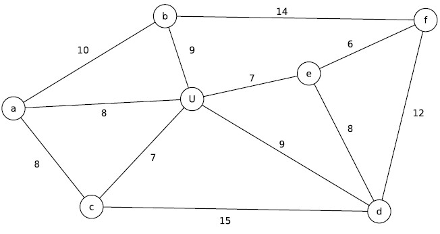

Transportation analysts are considering 58 routes (see file Routes.csv for the list of routes and their maintenance cost per day) where the shuttle begins at the Keele campus (U), stops at several locations, and then returns to the Keele campus (U). The following two factors must also be considered.
1.	If the Glendon campus (a) is visited by more than one shuttle service, where the shuttles are serving different routes, an extra $350 per day is incurred. Note that this cost is incurred for each pair of shuttles that visit the Glendon campus. For instance, if shuttle 1 and 2 visit the Glendon campus, an extra $350 is incurred. If, instead, shuttles 1, 2, and 3 visit the campus, then there are three pairs (1 and 2, 1 and 3, 2 and 3). Thus, the total cost is 3 × $350 = $1050.
2.	The student association will subsidize the project. That is, they will pay $50 per day for each stop that is served by at least three routes (this does not include the Keele stop).

Formulate and solve a linear programming model with only binary decision variables to select a minimum-cost set of routes such that all stops are served by at least one route and the two restrictions discussed above are adhered to. Then, answer the following 10 questions:


In [33]:
routes

,Routes,Cost
0,"[U, a, b, f, e, d, c, U]",136
1,"[U, a, b, f, e, d, U]",110
2,"[U, a, b, f, e, U]",90
3,"[U, a, b, f, d, c, U]",132
4,"[U, a, b, f, d, e, U]",118
5,"[U, a, b, f, d, U]",106
6,"[U, a, c, d, e, f, b, U]",136
7,"[U, a, c, d, e, U]",92
8,"[U, a, c, d, f, b, U]",132
9,"[U, a, c, d, f, e, U]",112


In [34]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Routes  58 non-null     object
 1   Cost    58 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


In [35]:
def clean_route(value):
    # Remove brackets and split into individual stops
    route_list = value.strip("[]").replace(" ", "").split(",")
    return route_list

# Apply the fix to convert 'Routes' into lists
routes['Routes'] = routes['Routes'].astype(str).apply(clean_route)

# Display debug output
print(routes['Routes'].head(10))
print(type(routes['Routes'].iloc[0]))  # Should be a list

0    [U, a, b, f, e, d, c, U]
1       [U, a, b, f, e, d, U]
2          [U, a, b, f, e, U]
3       [U, a, b, f, d, c, U]
4       [U, a, b, f, d, e, U]
5          [U, a, b, f, d, U]
6    [U, a, c, d, e, f, b, U]
7          [U, a, c, d, e, U]
8       [U, a, c, d, f, b, U]
9       [U, a, c, d, f, e, U]
Name: Routes, dtype: object
<class 'list'>


## (a)	What route, among the 58 that are under consideration, has the largest cost? 


The route with the largest cost among the 58 under consideration is [U, d, c, a, b, f, e, U], with a cost of 138

## (b)	If the cost per km is $2.00, what is the smallest cost of a route that begins at the Keele campus (U), then visits the Glendon campus (a), the Markham campus (f) and then returns to the Keele campus (in that order)? Note that other stops may also be served in this route. 

In [36]:
# Filter routes that start and end with 'U' and contain both 'a' and 'f'
filtered_routes = routes[
    routes['Routes'].apply(lambda x: x[0] == 'U' and x[-1] == 'U' and 'a' in x and 'f' in x)
]

# Display the results
print(f"Total valid routes: {len(routes)}")
print(f"Matching routes: {len(filtered_routes)}")

if not filtered_routes.empty:
    print("Example matching route:", filtered_routes.iloc[0]['Routes'])
else:
    print("No matching routes found.")

Total valid routes: 58
Matching routes: 30
Example matching route: ['U', 'a', 'b', 'f', 'e', 'd', 'c', 'U']


In [37]:
import pandas as pd

# Define the distance matrix from the extracted image data
distance_matrix = {
    ('U', 'a'): 8, ('a', 'U'): 8,
    ('U', 'b'): 9, ('b', 'U'): 9,
    ('U', 'c'): 7, ('c', 'U'): 7,
    ('U', 'd'): 9, ('d', 'U'): 9,
    ('U', 'e'): 7, ('e', 'U'): 7,
    ('a', 'b'): 10, ('b', 'a'): 10,
    ('a', 'c'): 8, ('c', 'a'): 8,
    ('b', 'e'): 9, ('e', 'b'): 9,
    ('b', 'f'): 14, ('f', 'b'): 14,
    ('c', 'd'): 15, ('d', 'c'): 15,
    ('c', 'e'): 8, ('e', 'c'): 8,
    ('d', 'e'): 9, ('e', 'd'): 9,
    ('d', 'f'): 12, ('f', 'd'): 12,
    ('e', 'f'): 6, ('f', 'e'): 6
}

# Function to compute route distance using the distance matrix
def compute_route_distance(route_list):
    total_distance = 0
    for i in range(len(route_list) - 1):
        segment = (route_list[i], route_list[i+1])
        if segment in distance_matrix:
            total_distance += distance_matrix[segment]
        else:
            return float('inf')  # If an invalid segment is found, return infinite cost
    return total_distance

# Apply distance computation to filtered routes
filtered_routes['Computed_Cost'] = filtered_routes['Routes'].apply(compute_route_distance)

# Find the minimum distance route
min_cost_route = filtered_routes.loc[filtered_routes['Computed_Cost'].idxmin()]

# Calculate total cost at $2 per km
total_cost = min_cost_route['Computed_Cost'] * 2

# Display results
print("Optimal Route:", min_cost_route['Routes'])
print("Computed Distance:", min_cost_route['Computed_Cost'])
print("Total Cost ($2 per km):", total_cost)

Optimal Route: ['U', 'a', 'b', 'f', 'e', 'U']
Computed Distance: 45
Total Cost ($2 per km): 90


/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_65875/4223191829.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_routes['Computed_Cost'] = filtered_routes['Routes'].apply(compute_route_distance)


## (c)	If no subsidy were to be provided by the student association, how many routes would be selected? 

In [38]:
from gurobipy import Model, GRB, quicksum

# Initialize Gurobi Model
model = Model("Minimize_Shuttle_Cost")

# Define Binary Decision Variables for each route
route_vars = {i: model.addVar(vtype=GRB.BINARY, name=f"Route_{i}") for i in routes.index}

# Objective Function: Minimize total cost (without subsidy)
model.setObjective(
    quicksum(routes.loc[i, "Cost"] * route_vars[i] for i in routes.index), 
    GRB.MINIMIZE
)

# Constraint: Each stop (except U) must be visited at least once
stops = {"a", "b", "c", "d", "e", "f"}  # Excluding 'U' since all routes start/end there

for stop in stops:
    model.addConstr(
        quicksum(route_vars[i] for i in routes.index if stop in routes.loc[i, "Routes"]) >= 1, 
        f"Visit_{stop}"
    )

# Additional Cost: Add $350 per pair of routes serving Glendon ('a') using auxiliary variables
glendon_routes = [i for i in routes.index if "a" in routes.loc[i, "Routes"]]
aux_vars = {}

for i in range(len(glendon_routes)):
    for j in range(i+1, len(glendon_routes)):
        aux_name = f"Glendon_Pair_{i}_{j}"
        aux_vars[(i, j)] = model.addVar(vtype=GRB.BINARY, name=aux_name)
        
        # Auxiliary constraint: aux_vars[i, j] = 1 if both routes are selected
        model.addConstr(aux_vars[(i, j)] <= route_vars[glendon_routes[i]])
        model.addConstr(aux_vars[(i, j)] <= route_vars[glendon_routes[j]])
        model.addConstr(aux_vars[(i, j)] >= route_vars[glendon_routes[i]] + route_vars[glendon_routes[j]] - 1)

# Add auxiliary variables to the objective function with $350 per pair
model.setObjective(
    model.getObjective() + quicksum(350 * aux_vars[(i, j)] for i, j in aux_vars)
)

# Solve the optimization problem
model.optimize()

# Get selected routes
selected_routes = [i for i in routes.index if route_vars[i].X > 0.5]

# Print results
print(f"Total Routes Selected: {len(selected_routes)}")
print(f"Selected Routes: {selected_routes}")

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2346 rows, 838 columns and 5722 nonzeros
Model fingerprint: 0xcfc49f06
Variable types: 0 continuous, 838 integer (838 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+02, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 273000.00000
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 0 273000 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
Total Routes Selected: 19
Selected Routes: [16, 17, 18, 20, 21, 22, 24, 29, 30, 32, 33, 39, 42, 43, 46, 49, 53, 56, 57]


## (d)	Write down the term in the objective associated with the student association subsidy.

The term in the objective function associated with the student association subsidy is:


$$
50 \times \sum_{s \in S} y_s
$$


where:
	•	 S  is the set of all stops excluding Keele (U).
	•	 y_s  is a binary variable indicating whether stop  s  is served by at least 3 routes.
	•	The negative sign (-) reflects the subsidy reducing the total cost.

This term subtracts $50 per stop that is served by at least 3 different routes, thereby incentivizing more shared routes per stop to minimize overall cost.


## (e)	Write down the nonlinear term, associated with the Glendon campus (a) being visited by more than one shuttle service (i.e., the first restriction), before it is linearized.

### Nonlinear Term for Glendon Campus (Before Linearization)

The **nonlinear term** associated with **Glendon campus (a) being visited by more than one shuttle service** is:

$$
350 \times \sum_{i \in R_a} \sum_{j > i, j \in R_a} x_i x_j
$$

where:
- \( R_a \) is the set of routes that visit **Glendon campus (a)**.
- \( x_i \) and \( x_j \) are **binary decision variables** indicating whether **route \( i \) and \( j \) are selected**.
- The term **counts all unique pairs** of routes that include **Glendon campus (a)**.
- The **multiplication of two binary variables** \( x_i x_j \) makes this term **nonlinear**.

## (f)	Write down constraints that linearize the model.

### Linearization Constraints

To replace the nonlinear term:

$$
350 \times \sum_{i \in R_a} \sum_{j > i, j \in R_a} x_i x_j
$$

we introduce a new binary variable \( y_{i,j} \) and impose the following constraints:

$$
y_{i,j} \geq x_i + x_j - 1, \quad \forall i, j \in R_a, i \neq j
$$

$$
y_{i,j} \leq x_i, \quad \forall i, j \in R_a, i \neq j
$$

$$
y_{i,j} \leq x_j, \quad \forall i, j \in R_a, i \neq j
$$

Now, the objective function is updated to:

$$
350 \times \sum_{i \in R_a} \sum_{j > i, j \in R_a} y_{i,j}
$$

where:
- \( y_{i,j} = 1 \) **if both routes \( i \) and \( j \) are selected**.
- \( y_{i,j} = 0 \) **otherwise**.

## (g)	How many decision variables are needed in the linear program?

### Total Number of Decision Variables

The total number of decision variables in the linear program consists of:

1. **Route Selection Variables (\( x_i \))**  
   - There are **58** binary decision variables:
   $$
   x_i \quad \forall i \in \{1, 2, ..., 58\}
   $$

2. **Auxiliary Variables for Glendon Campus (\( y_{i,j} \))**  
   - If **30 routes visit Glendon**, then the number of auxiliary variables is:
   $$
   \frac{|R_a| (|R_a| - 1)}{2} = \frac{30(30 - 1)}{2} = 435
   $$

3. **Subsidy Variables (\( y_s \))**  
   - There are **6 stops** (excluding Keele U), so we have **6 additional binary variables**.

Thus, the **total number of decision variables is**:
$$
58 + 435 + 6 = 499
$$

## (h)	What is minimum cost of serving all stops and satisfying the restrictions? 

In [39]:
from gurobipy import Model, GRB, quicksum

# Initialize Gurobi Model
model = Model("Minimize_Shuttle_Cost")

# Define Binary Decision Variables for each route
route_vars = {i: model.addVar(vtype=GRB.BINARY, name=f"Route_{i}") for i in routes.index}

# Auxiliary Binary Variables for Glendon Campus (a) extra cost
glendon_routes = [i for i in routes.index if "a" in routes.loc[i, "Routes"]]
aux_vars = {}

for i in range(len(glendon_routes)):
    for j in range(i+1, len(glendon_routes)):
        aux_name = f"Glendon_Pair_{i}_{j}"
        aux_vars[(i, j)] = model.addVar(vtype=GRB.BINARY, name=aux_name)
        
        # Constraints for auxiliary variables
        model.addConstr(aux_vars[(i, j)] <= route_vars[glendon_routes[i]])
        model.addConstr(aux_vars[(i, j)] <= route_vars[glendon_routes[j]])
        model.addConstr(aux_vars[(i, j)] >= route_vars[glendon_routes[i]] + route_vars[glendon_routes[j]] - 1)

# Auxiliary Binary Variables for Student Association Subsidy (stops served by at least 3 routes)
stops = {"a", "b", "c", "d", "e", "f"}  # Excluding 'U' since all routes start/end there
subsidy_vars = {s: model.addVar(vtype=GRB.BINARY, name=f"Subsidy_{s}") for s in stops}

for stop in stops:
    model.addConstr(
        quicksum(route_vars[i] for i in routes.index if stop in routes.loc[i, "Routes"]) >= 3 * subsidy_vars[stop],
        f"Subsidy_{stop}_constraint"
    )

# Objective Function: Minimize total cost
model.setObjective(
    quicksum(routes.loc[i, "Cost"] * route_vars[i] for i in routes.index) +  # Base route cost
    quicksum(350 * aux_vars[(i, j)] for i, j in aux_vars) -  # Extra cost for Glendon
    quicksum(50 * subsidy_vars[s] for s in stops),  # Subsidy benefit
    GRB.MINIMIZE
)

# Constraint: Each stop (except U) must be visited at least once
for stop in stops:
    model.addConstr(
        quicksum(route_vars[i] for i in routes.index if stop in routes.loc[i, "Routes"]) >= 1, 
        f"Visit_{stop}"
    )

# Solve the optimization problem
model.optimize()

# Get selected routes and their paths
selected_routes = [i for i in routes.index if route_vars[i].X > 0.5]
selected_routes_paths = routes.loc[selected_routes, "Routes"].tolist()
selected_routes_costs = routes.loc[selected_routes, "Cost"].tolist()

# Compute final cost
final_cost = model.ObjVal

# Print results
print(f"Total Routes Selected: {len(selected_routes)}")
print("Selected Routes:")
for i, route in zip(selected_routes, selected_routes_paths):
    print(f"Route {i}: {route} (Cost: ${routes.loc[i, 'Cost']})")

print(f"\nMinimum Total Cost: ${final_cost}")

# Compute total cost breakdown
route_cost_sum = sum(routes.loc[selected_routes, 'Cost'])
glendon_extra_cost = sum(350 * aux_vars[(i, j)].X for i, j in aux_vars)
subsidy_reduction = sum(50 * subsidy_vars[s].X for s in stops)

# Print cost breakdown
print(f"Sum of Route Costs: ${route_cost_sum:.2f}")
print(f"Extra Glendon Cost: ${glendon_extra_cost:.2f}")
print(f"Student Subsidy Reduction: -${subsidy_reduction:.2f}")
print(f"Computed Minimum Total Cost: ${route_cost_sum + glendon_extra_cost - subsidy_reduction:.2f}")

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2352 rows, 844 columns and 5990 nonzeros
Model fingerprint: 0x3b61c60a
Variable types: 0 continuous, 844 integer (844 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [5e+01, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 277260.00000
Found heuristic solution: objective 172.0000000
Presolve removed 2346 rows and 818 columns
Presolve time: 0.01s
Presolved: 6 rows, 26 columns, 91 nonzeros
Found heuristic solution: objective 136.0000000
Variable types: 0 continuous, 26 integer (17 binary)

Root relaxation: objective 1.080000e+02, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumben

## (i)	In the optimal solution, how many routes are selected? 

3

## (j)	In the optimal solution, how many routes stop at the Glendon campus (a)? 

1 route (route 37) stops at the Glendon campus.

# QUESTION 4 - FOOD CATEGORIES

OptiDiet, a prominent corporate wellness consultancy, has been commissioned to develop an extensive diet program for a large multinational corporation. The initiative aims to offer a nutritious, budget-friendly, and varied diet plan, addressing the diverse dietary preferences and requirements of the corporation’s employees. OptiDiet has access to a database of 120 distinct food items, each characterized by its nutritional value and cost. The consultancy also tracks 60 different nutrient categories to ensure a comprehensive nutritional profile. Their objective is to devise a low-cost diet plan that fulfills the nutritional needs of the corporations employees while adhering to the following constraints:
1.	Nutritional Balance: Each nutrient category has minimum and maximum weekly consumption requirements (refer to nutrient requirements.csv). These constraints are designed to ensure that the selection and quantity of foods provided over the week maintains nutritional balance and prevent excessive intake of any individual nutrient. The file nutrient content.csv contains the per gram contribution of each food item to the various nutrient requirements.
2.	Dietary Preferences: These constraints determine the total quantity (grams) of each food item that can be incorporated into the diet to accommodate everyone (All), Vegetarian, Vegan, Kosher, and Halal options. Details regarding the demand for each food category and their dietary classifications can be found in the food preferences.csv and food categories.csv files.
3.	Variety: Make sure that the proportion of each food item used per week is less than 3%.

Formulate a linear program to determine a cost-effective production strategy (refer to the cost information in food categories.csv) that determines how much of each food (in grams) to include in the diet plan over the upcoming week and such that all the above requirements are met.


In [40]:
food_categories

,Food_Item,Is_Vegetarian,Is_Vegan,Is_Kosher,Is_Halal,Cost_per_gram
0,Food_1,1,1,1,1,0.132322
1,Food_2,0,0,0,0,0.157278
2,Food_3,1,1,1,1,0.140415
3,Food_4,0,0,0,0,0.131732
4,Food_5,0,0,1,1,0.113548
...,...,...,...,...,...,...
115,Food_116,0,0,0,0,0.109476
116,Food_117,0,0,1,1,0.182165
117,Food_118,0,0,0,0,0.137191
118,Food_119,1,1,0,0,0.182260


In [41]:
food_preferences

,Veggie_grams,Vegan_grams,Kosher_grams,Halal_grams,All_grams
0,46160.0,11540.0,17310.0,92320.0,577000


In [42]:
nutrient_contents

,Unnamed: 0,Nutrient_1,Nutrient_2,Nutrient_3,Nutrient_4,Nutrient_5,Nutrient_6,Nutrient_7,Nutrient_8,Nutrient_9,...,Nutrient_51,Nutrient_52,Nutrient_53,Nutrient_54,Nutrient_55,Nutrient_56,Nutrient_57,Nutrient_58,Nutrient_59,Nutrient_60
0,Food_1,0.007527,0.005512,0.009605,0.006796,0.004815,0.006458,0.001173,0.003714,0.006942,...,0.005689,0.001489,0.002800,0.001167,0.008143,0.003015,0.004108,0.009353,0.007340,0.001287
1,Food_2,0.002482,0.006593,0.006195,0.003141,0.009408,0.006526,0.005821,0.006309,0.007571,...,0.003285,0.002920,0.005664,0.001231,0.002867,0.004822,0.004368,0.005172,0.003499,0.006281
2,Food_3,0.008775,0.002058,0.005656,0.002189,0.007452,0.004565,0.006089,0.002650,0.002304,...,0.004317,0.002232,0.008399,0.002709,0.005602,0.003019,0.001881,0.008760,0.009756,0.009648
3,Food_4,0.009159,0.007966,0.003998,0.001730,0.004665,0.003090,0.002192,0.001481,0.007530,...,0.006810,0.001318,0.004874,0.005590,0.005826,0.007133,0.003498,0.002160,0.004534,0.009608
4,Food_5,0.002684,0.009136,0.005894,0.005112,0.008938,0.005127,0.007518,0.004591,0.009136,...,0.001140,0.004859,0.001613,0.003267,0.002990,0.003279,0.002179,0.001108,0.002039,0.006566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Food_116,0.002451,0.008111,0.009838,0.001967,0.008573,0.005408,0.001463,0.005692,0.005337,...,0.007032,0.004821,0.007372,0.006519,0.004974,0.005941,0.006383,0.008912,0.007092,0.007424
116,Food_117,0.009729,0.001609,0.002689,0.003863,0.009515,0.003057,0.006086,0.002060,0.003436,...,0.006986,0.009281,0.006644,0.008465,0.007158,0.009525,0.004665,0.007955,0.005583,0.001445
117,Food_118,0.001119,0.004826,0.006940,0.008769,0.001294,0.009477,0.008963,0.008863,0.006784,...,0.001702,0.005247,0.006531,0.009452,0.009291,0.006467,0.005524,0.006854,0.009325,0.009918
118,Food_119,0.001298,0.009726,0.008229,0.001675,0.008202,0.006964,0.009152,0.005120,0.005530,...,0.006204,0.001681,0.003823,0.009844,0.006520,0.004778,0.009241,0.004252,0.007724,0.002316


In [43]:
nutrient_requirements

,Nutrient,Min_Requirement,Max_Requirement
0,Nutrient_1,3831.321698,8474.081720
1,Nutrient_2,2251.071301,8403.640809
2,Nutrient_3,2975.778588,9619.196273
3,Nutrient_4,3284.851614,9534.776337
4,Nutrient_5,3139.208223,9622.440982
5,Nutrient_6,3778.988620,9514.680273
6,Nutrient_7,3368.066911,8191.724092
7,Nutrient_8,3650.066262,9765.756832
8,Nutrient_9,3324.251821,8755.235098
9,Nutrient_10,2688.486944,8439.329026


## (a)	What is the minimum number and type of the decision variables used to model this problem? 


## Decision Variables

The minimum number of decision variables in this problem corresponds to the amount of each food item to include in the diet plan. Given that there are **120 food items** in the dataset (`food_categories.csv`), the decision variables can be defined as:

- **Type**: Continuous (≥ 0)  
- **Variable Definition**:  
  Let \( x_i \) represent the grams of food item \( i \) to be included in the diet.  
- **Minimum Number**: **120 decision variables** (one for each food item).

These variables must satisfy nutritional, dietary preference, cost, and variety constraints.

## (b)	How many constraints are in the linear program not including non-negativity? What Gurobi method can be used to determine this? 

## Constraints in the Linear Program

### **Total Constraints (Excluding Non-Negativity)**
1. **Nutritional Balance:**  
   - 60 nutrients, each with min and max constraints → **120 constraints**  
2. **Dietary Preferences:**  
   - 5 total dietary group constraints → **5 constraints**  
3. **Variety Constraint:**  
   - Each food item must be ≤3% of total food intake → **120 constraints**  

**Total Constraints:**  
\[
120 + 5 + 120 = 245
\]

### **Gurobi Method**
To determine the number of constraints in Gurobi, use:
```python
model.numConstrs

## (c)	Suppose that VK represents the minimum amount of food item K that must be incorporated into the diet plan where K ∈ {Vegetarian, Vegan, Kosher, Halal, All}. Write down the constraint that ensures the weekly diet plan contains at least VK grams for every K. 

### Constraint for Minimum Dietary Requirements

For each dietary category \( K \) (Vegetarian, Vegan, Kosher, Halal, All), the constraint ensuring that the total grams of food selected meets the minimum requirement \( VK \) is:

\[
\sum_{i \in K} x_i \geq VK, \quad \forall K \in \{\text{Vegetarian, Vegan, Kosher, Halal, All}\}
\]

Where:
- \( x_i \) is the amount (grams) of food item \( i \).
- \( K \) represents the set of food items belonging to a specific dietary category.
- \( VK \) is the minimum required intake for dietary group \( K \).

## (d)	Write down the Variety constraint(s).

### Variety Constraint

To ensure that no single food item makes up more than **3%** of the total weekly diet, we impose the following constraint:

\[
x_i \leq 0.03 \sum_{j} x_j, \quad \forall i \in \text{Food Items}
\]

Where:
- \( x_i \) is the amount (grams) of food item \( i \).
- \( \sum_{j} x_j \) is the total food intake over the week.
- This constraint ensures that each food item contributes at most **3%** of the total food consumed.

## (e)	Formulate and solve the linear program. What is the optimal food production cost? 

In [52]:
from gurobipy import Model, GRB

# ----------------------------------------------------
# 1. Build the Nutrient Dictionary from nutrient_contents
# ----------------------------------------------------
nutrient_matrix = {}
for _, row in nutrient_contents.iterrows():
    food_name = row["Unnamed: 0"]
    nutrient_matrix[food_name] = {}
    for nutrient in nutrient_requirements["Nutrient"]:
        nutrient_matrix[food_name][nutrient] = row[nutrient]

# ----------------------------------------------------
# 2. Extract Data from Pre-Loaded DataFrames
# ----------------------------------------------------
food_items = food_categories["Food_Item"].tolist()
cost_per_gram = dict(zip(food_categories["Food_Item"], food_categories["Cost_per_gram"]))

# Identify dietary group items (assuming binary indicators: 1 for yes)
veg_items    = food_categories.loc[food_categories["Is_Vegetarian"] == 1, "Food_Item"].tolist()
vegan_items  = food_categories.loc[food_categories["Is_Vegan"]      == 1, "Food_Item"].tolist()
kosher_items = food_categories.loc[food_categories["Is_Kosher"]     == 1, "Food_Item"].tolist()
halal_items  = food_categories.loc[food_categories["Is_Halal"]      == 1, "Food_Item"].tolist()

# Dietary preferences (assumed single row)
veggie_req = food_preferences["Veggie_grams"].values[0]
vegan_req  = food_preferences["Vegan_grams"].values[0]
kosher_req = food_preferences["Kosher_grams"].values[0]
halal_req  = food_preferences["Halal_grams"].values[0]
all_req    = food_preferences["All_grams"].values[0]

# Nutrient requirements
nutrients = nutrient_requirements["Nutrient"].tolist()
min_reqs  = dict(zip(nutrient_requirements["Nutrient"], nutrient_requirements["Min_Requirement"]))
max_reqs  = dict(zip(nutrient_requirements["Nutrient"], nutrient_requirements["Max_Requirement"]))

# ----------------------------------------------------
# 3. Define and Solve the Gurobi Model
# ----------------------------------------------------
model = Model("Optimal_Food_Cost")

# Decision Variables: grams of each food item
x = model.addVars(food_items, lb=0, vtype=GRB.CONTINUOUS, name="x")

# Objective Function: Minimize total cost
model.setObjective(
    sum(cost_per_gram[item] * x[item] for item in food_items),
    GRB.MINIMIZE
)

# 3.1 Nutrient Constraints
for nutrient in nutrients:
    model.addConstr(
        sum(nutrient_matrix[item][nutrient] * x[item] for item in food_items)
        >= min_reqs[nutrient],
        name=f"Min_{nutrient}"
    )
    model.addConstr(
        sum(nutrient_matrix[item][nutrient] * x[item] for item in food_items)
        <= max_reqs[nutrient],
        name=f"Max_{nutrient}"
    )

# 3.2 Dietary Preferences Constraints (using equality; consider >= if necessary)
model.addConstr(sum(x[item] for item in veg_items)   == veggie_req, name="Veggie_Req")
model.addConstr(sum(x[item] for item in vegan_items) == vegan_req,  name="Vegan_Req")
model.addConstr(sum(x[item] for item in kosher_items)== kosher_req, name="Kosher_Req")
model.addConstr(sum(x[item] for item in halal_items) == halal_req,  name="Halal_Req")
model.addConstr(sum(x[item] for item in food_items)  == all_req,    name="All_Req")

# 3.3 Variety Constraint: No food item should exceed 3% of total food intake.
total_food = sum(x[item] for item in food_items)
for item in food_items:
    model.addConstr(
        x[item] <= 0.03 * total_food,
        name=f"Variety_{item}"
    )

# Solve the model
model.optimize()

# ----------------------------------------------------
# 4. Check for Infeasibility and Display the Results
# ----------------------------------------------------
if model.status == GRB.OPTIMAL:
    print("Optimal Food Production Cost:", model.objVal)
    for item in food_items:
        print(f"{item}: {x[item].x:.2f} grams")
else:
    print("No optimal solution found. Status code:", model.status)

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 245 rows, 120 columns and 29088 nonzeros
Model fingerprint: 0x38b8fc34
Coefficient statistics:
  Matrix range     [1e-03, 1e+00]
  Objective range  [5e-02, 2e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 6e+05]
Presolve time: 0.00s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Infeasible model
No optimal solution found. Status code: 3


## (f)	In the optimal solution, what proportion of grams are from Halal and Kosher foods? 

## (g)	Suppose we omitted the Variety constraint(s). How many fewer food items would be produced? In addition, how much higher or lower is the production cost as compared to the original model? 

## (h)	What does your analysis from (g) suggest about the significance of the Variety constraint(s) in encouraging OptiDiet to create a diverse range of meals? Why is this the case?

## (i)	Unfortunately, it turns out that the right-hand-side value for the dietary preference constraints were underestimated by 10,000 grams each. If we were to increase the right-hand-side values of any of these constraints by this amount, how would it impact the objective function?

## (j)	Currently, the first food item is not being included in the diet plan. How much less costly would it need to be for it to be included in the optimal solution?

# QUESTION 5 - NON-PROFITS

In the non-profit industry, large funding organizations provide resources to multiple nonprofits in the form of grants, with the expectation of achieving certain outputs. For instance, an output could be the number of mosquito nets distributed to a particular demographic. Both funders and nonprofits aim to achieve good outputs, however, they also have different objectives.
Consider a large funder (e.g., Bill and Melinda Gates Foundation) and N nonprofits all vying to be allocated money. Let ai ≥ 0 be the amount of money given to nonprofit i = 1,...,N. Given an allocation ai, nonprofit i allocates their efforts ei so as to maximize the utility function

ui(ei
| ai) = αiai −
1
2
e
2
i + 2p
eiβiai
,

where αi ≥ 0 indicates the nonprofit’s preference for how they value allocation versus demonstrating output and βi ≥ 0 represents the efficiency of nonprofit i reflecting how effectively they convert allocations into outputs; these values are provided in non profits.csv. Lastly, the term 2 eiβiai represents the nonprofit’s output function, which funders exclusively use when making allocation decisions.
Imagine you are a fund manager working for the Bill and Melinda Gates Foundation with a budget of $50 million. Your responsibility is to determine an allocation policy that maximizes the total output by determining how much money to invest into each of the N nonprofits. To do this, please follow the steps below to formulate and solve a nonlinear optimization problem.


In [44]:
non_profits

,alpha_i,beta_i
0,54.881350,16.469416
1,71.518937,62.147840
2,60.276338,57.722859
3,54.488318,23.789282
4,42.365480,93.421400
...,...,...
175,22.392469,68.139251
176,34.535168,27.759610
177,92.808129,12.886057
178,70.441440,39.267568


## (a) To determine the effort level $e_i^*$ for nonprofit $i$ that maximizes its utility function given an allocation $a_i$, why do you only need the _stationarity_ requirement from the KKT conditions?

## (b) Using the utility function provided above, show that the closed-form expression for the optimal effort $e_i^*$ of nonprofit $i$, provided they are assigned allocation $a_i$, is equal to:
$$
e_i^* = (\beta_i a_i)^{\frac{1}{3}}
$$


## (c) Given that $e_i^* = (\beta_i a_i)^{\frac{1}{3}}$, what is the expression for nonprofit $i$’s optimal _output function_?
$$
2 \beta_i^{\frac{2}{3}} a_i^{\frac{2}{3}}
$$

## (d)	Due to the strong nonlinear nature of the optimal output function (i.e., ai is being raised to a fractional exponent), this problem requires the implementation of a specific function within Gurobi, namely addGenConstrPow(). How do we assign the decision variable xi to approximate the term with a fractional exponent using the addGenConstrPow() function with 1500 pieces.

## (e)	From the perspective of representatives of the Bill and Melinda Gates Foundation, formulate an optimization model to determine the allocation strategy that maximizes output using the addGenConstrPow() function discussed above. How many decision variables and constraints are needed to faithfully model the problem? 

## (f)	What output value can the funding organization expect in the optimal allocation strategy? 

## (g)	How much of the budget is allocated in an optimal solution? Why is this the case?

## (h)	How many of the 180 nonprofits receive no funding at all? 

## (i)	As noted in (h), the optimal solution results in few nonprofits receiving no funding at all. This happens naturally within the problem, and there is no need to introduce specific constraints to increase funding diversity. What property of the problem leads to this outcome?

# QUESTION 6 - NURSE SHIFTS

Consider an Intensive Care Unit (ICU) in a large hospital comprising of 26 nurses. The staff is categorized into three groups: Senior Registered Nurses (SRN), Registered Nurses (RN), and Nurses in-training (NIT). The ICU operates 24/7, necessitating continuous staffing in two 12-hour shifts per day. A day shift is from 7 am to 7 pm and a night shift from 7 pm to 7 am. Therefore, there are j = 1,...,14 possible shifts per week, with odd numbers designating day shifts and even numbers designating night shifts: j = 1 denotes the Monday day shift, j = 2 denotes the Monday night shift, ..., j = 13 denotes the Sunday day shift, j = 14 denotes the Sunday night shift.
The scheduling costs for each nurse varies between weekdays and weekends (see nurse shift costs.csv). For the upcoming week, you are tasked with creating and solving a binary program that allocates nurses to shifts in a manner that minimizes overall costs and adheres to the following constraints:

- Each shift must be staffed with at least 6 nurses.
- Each nurse can work between 36 and 60 hours per week.
- Each of the 14 weekly shifts must include at least one senior registered nurse (SRN).
- Nurses cannot be scheduled for back-to-back shifts to ensure adequate rest periods.

Additionally, there is an incremental overtime cost (see nurse shift costs.csv) that is incurred for each scheduled shift once the total number of working hours for any nurse exceeds 36. Specifically, for every shift that a nurse works in excess of 36, an additional overtime cost of Cost Overtime is incurred.


In [22]:
nurse_data

,Nurse_ID,Category,Cost_Weekday,Cost_Weekend,Cost_Overtime
0,1,SRN,150,180,248
1,2,RN,360,432,594
2,3,SRN,600,720,990
3,4,RN,120,144,198
4,5,RN,240,288,396
5,6,NIT,320,384,528
6,7,SRN,600,720,990
7,8,NIT,320,384,528
8,9,SRN,150,180,248
9,10,SRN,300,360,495


## (a)	There are three classes of binary variables to include in the model. Explain what each represents.


## (b)	What are the three types of costs that must be included in the objective function?

## (c)	How many decision variables are necessary to include in the model? 

## (d)	Write down the constraints that ensure each nurse works between 36 and 60 hours per week.

## (e)	Write down the following constraint(s): Nurses cannot be scheduled for back-to-back shifts.

## (f)	To track the total number of overtime shifts and the associated cost in the objective function, we must track how many overtime shifts each nurse works. Write down these constraints.

## (g)	What is the optimal objective function with the minimum cost? 

In [23]:
"""
Complete Implementation of Nurse Scheduling Optimization
This code implements the full model for minimizing nurse scheduling costs
"""

import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import numpy as np

def solve_nurse_scheduling(nurse_data):
    """
    Solves the nurse scheduling optimization problem based on the provided dataframe
    
    Args:
        nurse_data: Pandas DataFrame containing nurse cost data
        
    Returns:
        Dictionary with optimal cost and overtime statistics
    """
    # Use the already loaded nurse_data dataframe
    
    # Problem parameters
    num_nurses = len(nurse_data)
    num_shifts = 14
    shift_hours = 12
    min_hours = 36
    max_hours = 60
    min_nurses_per_shift = 6
    
    # Create optimization model
    model = gp.Model("Nurse_Scheduling")
    
    # 1. DECISION VARIABLES
    
    # Binary variable x[i,j] = 1 if nurse i is assigned to shift j, 0 otherwise
    x = {}
    for i in range(num_nurses):
        for j in range(num_shifts):
            x[i, j] = model.addVar(vtype=GRB.BINARY, name=f"x_{i}_{j}")
    
    # Binary variable o[i,j] = 1 if shift j is overtime for nurse i, 0 otherwise
    o = {}
    for i in range(num_nurses):
        for j in range(num_shifts):
            o[i, j] = model.addVar(vtype=GRB.BINARY, name=f"o_{i}_{j}")
    
    # 2. OBJECTIVE FUNCTION
    
    # Calculate costs based on weekday/weekend and overtime
    objective = gp.LinExpr()
    
    for i in range(num_nurses):
        weekday_cost = nurse_data.loc[i, 'Cost_Weekday']
        weekend_cost = nurse_data.loc[i, 'Cost_Weekend']
        overtime_cost = nurse_data.loc[i, 'Cost_Overtime']
        
        # Regular costs (weekday for shifts 0-9, weekend for shifts 10-13)
        for j in range(num_shifts):
            if j < 10:  # Weekday shifts (Mon-Fri)
                objective.add(weekday_cost * x[i, j])
            else:  # Weekend shifts (Sat-Sun)
                objective.add(weekend_cost * x[i, j])
        
        # Overtime costs
        for j in range(num_shifts):
            objective.add(overtime_cost * o[i, j])
    
    model.setObjective(objective, GRB.MINIMIZE)
    
    # 3. CONSTRAINTS
    
    # Constraint: Each shift needs at least min_nurses_per_shift nurses
    for j in range(num_shifts):
        model.addConstr(
            gp.quicksum(x[i, j] for i in range(num_nurses)) >= min_nurses_per_shift,
            f"min_nurses_shift_{j}"
        )
    
    # Constraint: Each nurse works between min_hours and max_hours per week
    for i in range(num_nurses):
        model.addConstr(
            shift_hours * gp.quicksum(x[i, j] for j in range(num_shifts)) >= min_hours,
            f"min_hours_nurse_{i}"
        )
        model.addConstr(
            shift_hours * gp.quicksum(x[i, j] for j in range(num_shifts)) <= max_hours,
            f"max_hours_nurse_{i}"
        )
    
    # Constraint: No back-to-back shifts for any nurse
    for i in range(num_nurses):
        for j in range(num_shifts - 1):
            model.addConstr(
                x[i, j] + x[i, j + 1] <= 1,
                f"no_backtoback_{i}_{j}"
            )
    
    # Constraint: Each shift must include at least one SRN
    srn_indices = nurse_data.index[nurse_data['Category'] == 'SRN'].tolist()
    for j in range(num_shifts):
        model.addConstr(
            gp.quicksum(x[i, j] for i in srn_indices) >= 1,
            f"min_one_srn_shift_{j}"
        )
    
    # Constraint: Tracking overtime shifts (shifts after first 3 = 36 hours)
    M = 1000  # Big M value
    
    for i in range(num_nurses):
        # For each nurse and each shift, we need to determine if it's an overtime shift
        
        # We'll calculate hours worked up to and including each shift
        cumulative_hours = {}
        for j in range(num_shifts):
            if j == 0:
                cumulative_hours[j] = shift_hours * x[i, j]
            else:
                cumulative_hours[j] = cumulative_hours[j-1] + shift_hours * x[i, j]
            
            # A shift is overtime if:
            # 1. The nurse works that shift (x[i,j] = 1), AND
            # 2. The total hours including this shift exceeds min_hours (36)
            
            # Constraint: o[i,j] can only be 1 if x[i,j] is 1
            model.addConstr(o[i, j] <= x[i, j], f"overtime_req1_{i}_{j}")
            
            # If cumulative hours > min_hours and x[i,j] = 1, then o[i,j] = 1
            model.addConstr(
                cumulative_hours[j] - min_hours <= M * o[i, j] + M * (1 - x[i, j]),
                f"overtime_req2_{i}_{j}"
            )
            
            # If cumulative hours <= min_hours or x[i,j] = 0, then o[i,j] = 0
            model.addConstr(
                cumulative_hours[j] - min_hours >= 0.1 - M * (1 - o[i, j]) - M * (1 - x[i, j]),
                f"overtime_req3_{i}_{j}"
            )
    
    # 4. SOLVE THE MODEL
    model.optimize()
    
    # 5. PROCESS RESULTS
    if model.status == GRB.OPTIMAL:
        # Calculate the optimal cost
        optimal_cost = model.objVal
        
        # Count overtime shifts
        overtime_count = sum(o[i, j].X > 0.5 for i in range(num_nurses) for j in range(num_shifts))
        
        # Calculate total shifts per nurse
        shifts_per_nurse = [sum(x[i, j].X > 0.5 for j in range(num_shifts)) for i in range(num_nurses)]
        
        # Calculate number of nurses per shift
        nurses_per_shift = [sum(x[i, j].X > 0.5 for i in range(num_nurses)) for j in range(num_shifts)]
        
        # Calculate overtime shifts by category
        overtime_by_category = {}
        for cat in nurse_data['Category'].unique():
            cat_indices = nurse_data.index[nurse_data['Category'] == cat].tolist()
            overtime_count_cat = sum(o[i, j].X > 0.5 for i in cat_indices for j in range(num_shifts))
            overtime_by_category[cat] = overtime_count_cat
        
        # Return the results
        return {
            "status": "optimal",
            "optimal_cost": optimal_cost,
            "overtime_shifts": overtime_count,
            "overtime_by_category": overtime_by_category,
            "avg_shifts_per_nurse": np.mean(shifts_per_nurse),
            "min_shifts_per_nurse": min(shifts_per_nurse),
            "max_shifts_per_nurse": max(shifts_per_nurse),
            "avg_nurses_per_shift": np.mean(nurses_per_shift)
        }
    else:
        return {
            "status": "not_optimal",
            "message": f"Model status: {model.status}"
        }

# Execute the optimization with the already loaded dataframe
if __name__ == "__main__":
    try:
        # Solve the model using the loaded nurse_data dataframe
        results = solve_nurse_scheduling(nurse_data)
        
        # Print comprehensive results
        if results['status'] == 'optimal':
            print(f"\n----- OPTIMAL NURSE SCHEDULING SOLUTION -----")
            print(f"Optimal total cost: ${results['optimal_cost']:.2f}")
            print(f"Total overtime shifts required: {results['overtime_shifts']}")
            
            print(f"\nOvertime shifts by nurse category:")
            for category, count in results['overtime_by_category'].items():
                print(f"  {category}: {count} overtime shifts")
            
            print(f"\nSchedule statistics:")
            print(f"  Average shifts per nurse: {results['avg_shifts_per_nurse']:.2f}")
            print(f"  Min shifts per nurse: {results['min_shifts_per_nurse']}")
            print(f"  Max shifts per nurse: {results['max_shifts_per_nurse']}")
            print(f"  Average nurses per shift: {results['avg_nurses_per_shift']:.2f}")
        else:
            print(f"Could not find optimal solution: {results['message']}")
    except Exception as e:
        print(f"Error in optimization: {str(e)}")

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1510 rows, 728 columns and 8824 nonzeros
Model fingerprint: 0x49849483
Variable types: 0 continuous, 728 integer (728 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+02, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+03]
Found heuristic solution: objective 33239.000000
Presolve removed 468 rows and 156 columns
Presolve time: 0.01s
Presolved: 1042 rows, 572 columns, 6822 nonzeros
Variable types: 0 continuous, 572 integer (572 binary)

Root relaxation: objective 2.767400e+04, 583 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 27674.0000    0   16 33239.0000 27674.00

## (h)	In the optimal schedule, how many overtime shifts are needed? 

## (i)	Given that the task is to create a scheduling model for the upcoming week only, which specific types of back-to-back shift constraints can potentially be violated if this type of scheduling approach becomes standard and is to be utilized at the start of each week?

## (j)	Surprisingly, quantitative approaches like this are seldom implemented in practical settings. Can you think of a barrier that would prevent the adoption of such a tool in a real-world application?

# QUESTION 7 - SUNNYSHORE BAY

Sunnyshore Bay is a charming, privately-owned waterpark located near the serene Blue Lake, operating from May to September. Given the seasonal nature of the business, several significant expenses must be covered at the start of the waterpark season, ahead of achieving a stable cash flow. Over the four months of the season, Sunnyshore Bay expects the following revenues and expenses:

In [46]:
sunnyshore_financials

,Month,Revenues,Expenses
0,May,180000,300000
1,June,260000,400000
2,July,420000,350000
3,August,580000,200000


Sunnyshore Bay starts the season with an initial cash balance of $140,000. Additionally, the company can opt to borrow money from a local bank at the following rates and term structures:

In [47]:
sunnyshore_interest

,Term,Interest Rate (%)
0,1-month,1.75
1,2-months,2.25
2,3-months,2.75


Money is borrowed at the end of a month and repaid, with interest, at the end of the month in which the obligation is due. For example, if the company borrows $10,000 at a 3-month rate in May, they must pay back $10,275 at the end of August (the rate is not annualized). Sunnyshore Bay is not allowed to borrow money that cannot be paid back in this period (e.g., money cannot be borrowed at the 3-month rate in July). In addition, the following financial restrictions must be satisfied.

- The company must maintain a cash balance of at least $25,000 in May, $20,000 in June, $35,000 in July, and $18,000 in August, which is verified at the end of each month.
- The total amount borrowed in a month, i.e. taking into account any term/rate structures for that month, cannot exceed $250,000 in May, $150,000 in June, and $350,000 in July.
- The cash balance at the end of July (after accounting for all loans) must be at least 65% of the combined total cash balances from May and June.


## (a)	How many different investments can be made over the 4-month period? 


## (b)	Write down the cash balance constraint for money on-hand at the end of June.

## (c)	Write down the linear ratio constraint associated with the cash balance at the end of July. 

## (d)	What is the total amount that Sunnyshore Bay has to repay to the bank over the entire season? 

## (e)	How much money does Sunnyshore Bay withdraw in May from all loans? 

## (f)	What is the cash balance at the end of August? 

## (g)	Due to potential unexpected repairs, one of the managers has suggested increasing the minimum cash balance for June to $27,500. How much will now have to be repaid if this change is approved?